In [21]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import os,string

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [2]:
os.listdir('/kaggle/input/az-handwritten-alphabets-in-csv-format')

['A_Z Handwritten Data.csv', 'A_Z Handwritten Data']

In [3]:
df = pd.read_csv("/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")

In [4]:
df.shape

(372450, 785)

In [5]:
df.head(1)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102,0.103,0.104,0.105,0.106,0.107,0.108,0.109,0.110,0.111,0.112,0.113,0.114,0.115,0.116,0.117,0.118,0.119,0.120,0.121,0.122,0.123,0.124,0.125,0.126,32,215,235,43,0.127,0.128,0.129,0.130,0.131,0.132,0.133,0.134,0.135,0.136,0.137,0.138,0.139,0.140,0.141,0.142,0.143,0.144,0.145,0.146,0.147,0.148,0.149,0.150,130,255,255.1,107,0.151,0.152,0.153,0.154,0.155,0.156,0.157,0.158,0.159,0.160,0.161,0.162,0.163,0.164,0.165,0.166,0.167,0.168,0.169,0.170,0.171,0.172,0.173,14,227,255.2,255.3,107.1,0.174,0.175,0.176,0.177,0.178,0.179,0.180,0.181,0.182,0.183,0.184,0.185,0.186,0.187,0.188,0.189,0.190,0.191,0.192,0.193,0.194,0.195,0.196,152,255.4,255.5,255.6,162,0.197,0.198,0.199,0.200,0.201,0.202,0.203,0.204,0.205,0.206,0.207,0.208,0.209,0.210,0.211,0.212,0.213,0.214,0.215,0.216,0.217,0.218,91,255.7,255.8,255.9,255.10,190,0.219,0.220,0.221,0.222,0.223,0.224,0.225,0.226,0.227,0.228,0.229,0.230,0.231,0.232,0.233,0.234,0.235,0.236,0.237,0.238,0.239,47,237,255.11,212,188,255.12,190.1,0.240,0.241,0.242,0.243,0.244,0.245,0.246,0.247,0.248,0.249,0.250,0.251,0.252,0.253,0.254,0.255,0.256,0.257,0.258,0.259,0.260,113,255.13,255.14,97,136,255.15,190.2,0.261,0.262,0.263,0.264,0.265,0.266,0.267,0.268,0.269,0.270,0.271,0.272,0.273,0.274,0.275,0.276,0.277,0.278,0.279,0.280,43.1,235.1,255.16,158,0.281,136.1,255.17,107.2,0.282,0.283,0.284,0.285,0.286,0.287,0.288,0.289,0.290,0.291,0.292,0.293,0.294,0.295,0.296,0.297,0.298,0.299,0.300,0.301,107.3,255.18,255.19,75,0.302,136.2,255.20,107.4,0.303,0.304,0.305,0.306,0.307,0.308,0.309,0.310,0.311,0.312,0.313,0.314,0.315,0.316,0.317,0.318,0.319,0.320,0.321,67,233,255.21,255.22,255.23,212.1,215.1,255.24,206,170,170.1,142,0.322,0.323,0.324,0.325,0.326,0.327,0.328,0.329,0.330,0.331,0.332,0.333,0.334,0.335,0.336,0.337,156,255.25,255.26,255.27,255.28,255.29,255.30,255.31,255.32,255.33,255.34,255.35,0.338,0.339,0.340,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350,0.351,0.352,40,255.36,255.37,255.38,243,128,156.1,188.1,255.39,255.40,176,117,57,0.353,0.354,0.355,0.356,0.357,0.358,0.359,0.360,0.361,0.362,0.363,0.364,0.365,0.366,0.367,67.1,255.41,255.42,142.1,0.368,0.369,0.370,53,255.43,190.3,0.371,0.372,0.373,0.374,0.375,0.376,0.377,0.378,0.379,0.380,0.381,0.382,0.383,0.384,0.385,0.386,0.387,4,229,255.44,239,20,0.388,0.389,0.390,53.1,255.45,190.4,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400,0.401,0.402,0.403,0.404,0.405,0.406,0.407,89,255.46,255.47,176.1,0.408,0.409,0.410,0.411,53.2,255.48,233.1,12,0.412,0.413,0.414,0.415,0.416,0.417,0.418,0.419,0.420,0.421,0.422,0.423,0.424,0.425,0.426,0.427,227.1,255.49,249,71,0.428,0.429,0.430,0.431,0.432,225,255.50,18,0.433,0.434,0.435,0.436,0.437,0.438,0.439,0.440,0.441,0.442,0.443,0.444,0.445,0.446,0.447,0.448,144,223,130.1,0.449,0.450,0.451,0.452,0.453,0.454,170.2,255.51,101,0.455,0.456,0.457,0.458,0.459,0.460,0.461,0.462,0.463,0.464,0.465,0.466,0.467,0.468,0.469,0.470,0.471,0.472,0.473,0.474,0.475,0.476,0.477,0.478,0.479,142.2,255.52,184,0.480,0.481,0.482,0.483,0.484,0.485,0.486,0.487,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,59,255.53,255.54,12.1,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,59.1,255.55,152.1,4.1,0.529,0.530,0.531,0.532,0.533,0.534,0.535,0.536,0.537,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.56

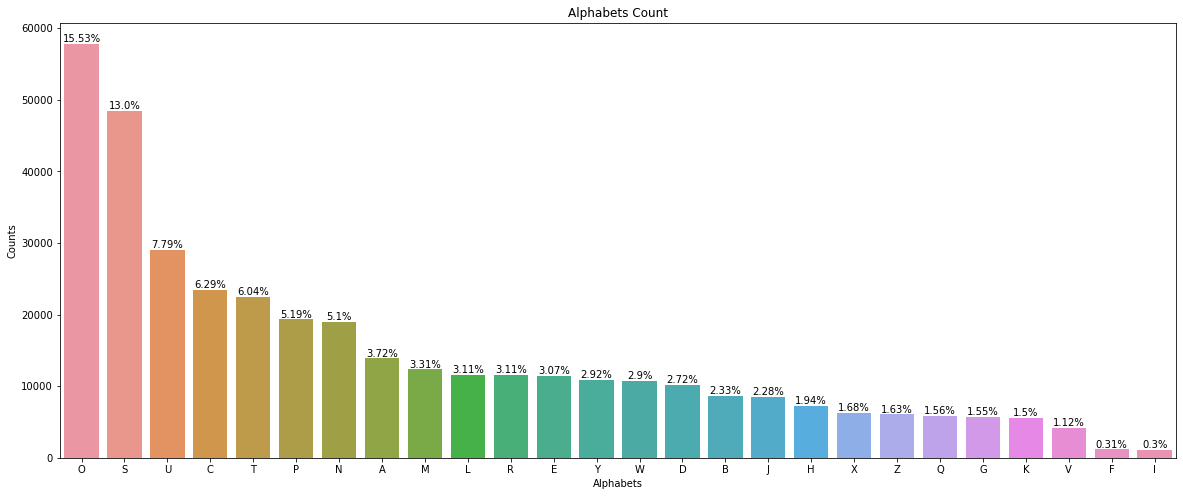

In [6]:
df_alphabets_counts =  df['0'].value_counts().reset_index()
df_alphabets_counts['index'] = df_alphabets_counts['index'].apply(lambda x: list(string.ascii_uppercase)[x])

plt.figure(figsize=(20,8))
ax = sns.barplot(x='index', y='0', data=df_alphabets_counts)

for i in ax.patches:
    v1 = round((i.get_height()/len(df))*100, 2)
    ax.annotate(f'{v1}%', (i.get_x()+0.4, i.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

plt.title("Alphabets Count")
plt.ylabel("Counts")
plt.xlabel("Alphabets")
plt.show()

In [7]:
IMG_WIDTH = 28
IMG_HEIHT = 28
IMG_CHANNEL = 1
EPOCH = 30
BATCH_SIZE = 32

In [8]:
X, y = df.drop(columns=['0']), df['0']

X = np.array(X)
y = np.array(y)

In [9]:
X = X/255.0
X = X.reshape(-1,IMG_WIDTH,IMG_HEIHT,IMG_CHANNEL)
y = to_categorical(y, num_classes = len(np.unique(df["0"])))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y, shuffle=True)

In [11]:
del X
del y
del df

In [12]:
def create_model():
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (IMG_WIDTH, IMG_HEIHT, IMG_CHANNEL)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation = "relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(26, activation = "softmax"))
    
    return model

In [13]:
model = create_model()
#model.summary()

model.compile(optimizer='adamax', loss = 'categorical_crossentropy', metrics=['accuracy'])


lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')


In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCH, batch_size=BATCH_SIZE, shuffle=True, callbacks=[es, lr_reduction])

Epoch 1/30
9312/9312 [==============================] - 86s 9ms/step - loss: 0.2001 - accuracy: 0.9436 - val_loss: 0.0602 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 2/30
9312/9312 [==============================] - 85s 9ms/step - loss: 0.0630 - accuracy: 0.9829 - val_loss: 0.0405 - val_accuracy: 0.9896 - lr: 0.0010
Epoch 3/30
9312/9312 [==============================] - 86s 9ms/step - loss: 0.0474 - accuracy: 0.9870 - val_loss: 0.0344 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 4/30
9312/9312 [==============================] - 85s 9ms/step - loss: 0.0394 - accuracy: 0.9892 - val_loss: 0.0309 - val_accuracy: 0.9922 - lr: 0.0010
Epoch 5/30
9312/9312 [==============================] - 86s 9ms/step - loss: 0.0329 - accuracy: 0.9908 - val_loss: 0.0268 - val_accuracy: 0.9935 - lr: 0.0010
Epoch 6/30
9312/9312 [==============================] - 85s 9ms/step - loss: 0.0282 - accuracy: 0.9921 - val_loss: 0.0293 - val_accuracy: 0.9923 - lr: 0.0010
Epoch 7/30
9312/9312 [==============================

In [15]:
model.evaluate(X_train, y_train), model.evaluate(X_test, y_test)

2328/2328 [==============================] - 9s 4ms/step - loss: 0.0153 - accuracy: 0.9977


([0.000869917101226747, 0.9997314810752869],
 [0.015313358046114445, 0.9977043867111206])

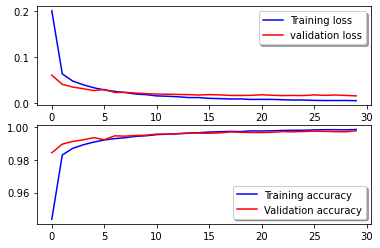

In [16]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

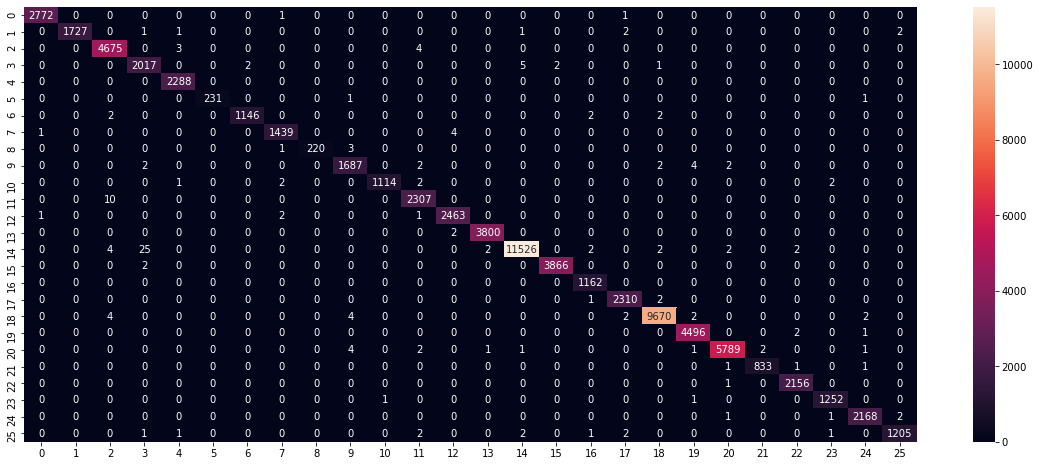




              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2774
           1       1.00      1.00      1.00      1734
           2       1.00      1.00      1.00      4682
           3       0.98      1.00      0.99      2027
           4       1.00      1.00      1.00      2288
           5       1.00      0.99      1.00       233
           6       1.00      0.99      1.00      1152
           7       1.00      1.00      1.00      1444
           8       1.00      0.98      0.99       224
           9       0.99      0.99      0.99      1699
          10       1.00      0.99      1.00      1121
          11       0.99      1.00      1.00      2317
          12       1.00      1.00      1.00      2467
          13       1.00      1.00      1.00      3802
          14       1.00      1.00      1.00     11565
          15       1.00      1.00      1.00      3868
          16       0.99      1.00      1.00      1162
          17       1.00 

In [22]:
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
ytest = np.argmax(y_test, axis=1)

cf_matrix = confusion_matrix(ytest, ypred)

plt.figure(figsize=(20,8))
ax = sns.heatmap(cf_matrix, annot=True, fmt='g')
plt.show()

print("\n\n")
print(classification_report(ytest, ypred))